In [1]:
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

1. You are given data of 78560 mobile phone data usage with the information of
features and you are supposed to analyze the data. Carry out exploratory data
analysis on the given dataset using different techniques(10 points)

Read the csv into a dataframe
1.checked top 5 rows, dimensions,dtypes for initial understanding
2.checked for null values, found no null values
3.dropped the timestamp related columns
4.plotted correlation matrix - all correlation coefficients are close to zero
5.check for outliers - not many outliers found in the data



In [9]:
df_network = pd.read_csv('network_congestion.csv')
df_network.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,2266,1034,113,395,68,10614,2,16,9,39,2,9,34,55,11888,88,15,15,10,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,4530,63,29,14,11,135,2,5,14,14,6,17,24,2,239,46,6,18,8,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,23753,171,18,6,52,3818,4,8,36,33,13,45,10,3,15763,8,40,145,23,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,7956,66,60,19,14,2114,18,10,98,8,2,14,80,40,153,12,7,34,3,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,7244,232,59,90,19,605,16,89,14,36,70,22,41,839,962,115,42,272,4,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


In [8]:
df_network.dtypes

cell_name                         int64
4G_rat                            int64
par_year                          int64
par_month                         int64
par_day                           int64
par_hour                          int64
par_min                           int64
subscriber_count                  int64
web_browsing_total_bytes          int64
video_total_bytes                 int64
social_ntwrking_bytes             int64
cloud_computing_total_bytes       int64
web_security_total_bytes          int64
gaming_total_bytes                int64
health_total_bytes                int64
communication_total_bytes         int64
file_sharing_total_bytes          int64
remote_access_total_bytes         int64
photo_sharing_total_bytes         int64
software_dwnld_total_bytes        int64
marketplace_total_bytes           int64
storage_services_total_bytes      int64
audio_total_bytes                 int64
location_services_total_bytes     int64
presence_total_bytes              int64


In [10]:
df_network.describe()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt
count,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000,78560.0000000
mean,2785899759.5658860,0.4991726,2018.0000000,12.0000000,15.5038315,11.5145876,33.0617363,571.1871309,8091.6730015,8293.3358707,8358.8662042,628.7575356,72.1028641,71.1504328,72.1239944,4287.0386074,18.4789333,18.1046970,39.4351197,38.8659369,32.1848905,70.3545952,32.4449593,70.6035132,4224.8675407,70.6884801,70.3080066,70.6195392,70.6897785,70.9871563,70.9454812,70.5948574,70.7192974,69.7281823,89.9917006,4.4921461,3.5030550
std,1604666791.5657854,0.5000025,0.0000000,0.0000000,8.6343753,6.9343512,16.5358626,1080.2635075,19145.5238315,19462.7831222,19498.2557732,1255.9474194,118.2546900,115.5418852,117.9176090,9836.6463374,25.7426496,25.2868461,60.0872068,60.3256766,48.4802490,115.2581522,49.0542039,117.3043760,9610.4458831,116.5859960,116.2211841,117.2552643,118.1023361,117.8219158,117.1346092,117.6471641,118.0329072,114.6193032,17.6383698,1.7092956,1.1152554
min,87377.0000000,0.0000000,2018.0000000,12.0000000,1.0000000,0.0000000,5.0000000,1.0000000,3.0000000,5.0000000,7.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,2.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,60.0000000,2.0000000,2.0000000
25%,1395259628.0000000,0.0000000,2018.0000000,12.0000000,8.0000000,5.0000000,20.0000000,71.0000000,431.0000000,471.0000000,469.0000000,69.0000000,14.0000000,14.0000000,13.0000000,275.0000000,5.0000000,4.0000000,9.0000000,8.0000000,7.0000000,13.0000000,7.0000000,13.0000000,270.0000000,13.0000000,13.0000000,13.0000000,13.0000000,13.0000000,13.0000000,13.0000000,13.0000000,13.0000000,75.0000000,3.0000000,3.0000000
50%,2786354421.5000000,0.0000000,2018.0000000,12.0000000,16.0000000,12.0000000,35.0000000,187.0000000,1545.5000000,1672.5000000,1682.0000000,189.0000000,31.0000000,31.0000000,31.0000000,914.0000000,10.0000000,10.0000000,19.0000000,18.0000000,15.0000000,30.0000000,16.0000000,30.0000000,903.5000000,30.0000000,30.0000000,30.0000000,30.0000000,30.0000000,30.0000000,30.0000000,30.0000000,30.0000000,90.0000000,4.0000000,4.0000000
75%,4172219735.0000000,1.0000000,2018.0000000,12.0000000,23.0000000,18.0000000,45.0000000,568.0000000,6565.0000000,6884.2500000,7008.5000000,593.0000000,77.0000000,76.0000000,77.0000000,3615.0000000,21.0000000,21.0000000,43.0000000,42.0000000,36.0000000,75.0000000,36.0000000,75.0000000,3554.2500000,75.0000000,75.0000000,75.0000000,75.0000000,75.0000000,76.0000000,74.0000000,75.0000000,75.0000000,105.0000000,6.0000000,4.0000000
max,5555540006.0000000,1.0000000,2018.0000000,12.0000000,30.0000000,23.0000000,60.0000000,16570.0000000,311008.0000000,331271.0000000,303204.0000000,18901.0000000,1666.0000000,1642.0000000,1575.0000000,160324.0000000,329.0000000,327.0000000,754.0000000

In [12]:
df_network.describe(include=object)

,ran_vendor,Congestion_Type
count,78560,78560
unique,3,4
top,ERICSSON,NC
freq,26209,19771


In [13]:
missing_values = df_network.isnull().sum()

# print the number of missing values of each variable
print(missing_values)

cell_name                        0
4G_rat                           0
par_year                         0
par_month                        0
par_day                          0
par_hour                         0
par_min                          0
subscriber_count                 0
web_browsing_total_bytes         0
video_total_bytes                0
social_ntwrking_bytes            0
cloud_computing_total_bytes      0
web_security_total_bytes         0
gaming_total_bytes               0
health_total_bytes               0
communication_total_bytes        0
file_sharing_total_bytes         0
remote_access_total_bytes        0
photo_sharing_total_bytes        0
software_dwnld_total_bytes       0
marketplace_total_bytes          0
storage_services_total_bytes     0
audio_total_bytes                0
location_services_total_bytes    0
presence_total_bytes             0
advertisement_total_bytes        0
system_total_bytes               0
voip_total_bytes                 0
speedtest_total_byte

In [22]:
df_network = df_network.drop(['par_year', 'par_month', 'par_day', 'par_hour', 'par_min'], axis = 1) 

KeyError: "['par_year' 'par_month' 'par_day' 'par_hour' 'par_min'] not found in axis"

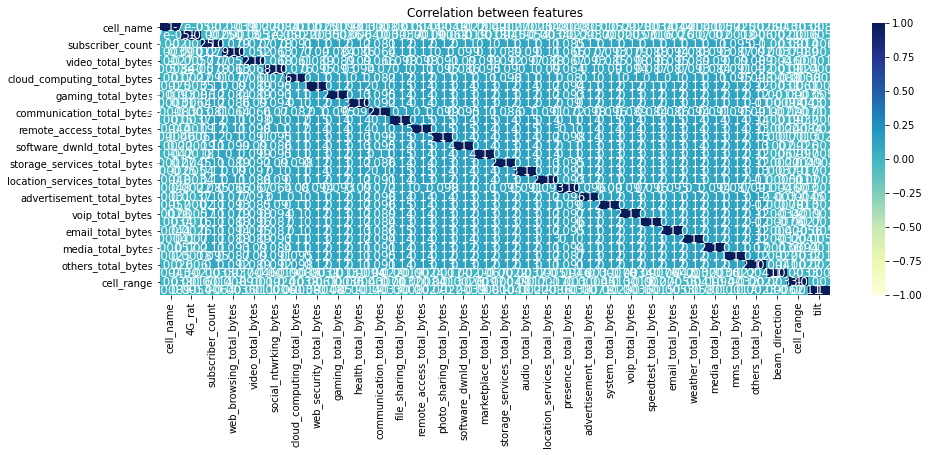

In [25]:
df_numeric_features = df_network.select_dtypes(include=[np.number])
corr = df_numeric_features.corr() 
plt.figure(figsize=(15, 5))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})
plt.title('Correlation between features')
plt.show()

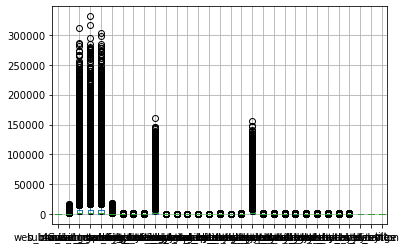

In [27]:
df_numeric_features.boxplot(column=['4G_rat', 'subscriber_count', 'web_browsing_total_bytes',
       'video_total_bytes', 'social_ntwrking_bytes',
       'cloud_computing_total_bytes', 'web_security_total_bytes',
       'gaming_total_bytes', 'health_total_bytes', 'communication_total_bytes',
       'file_sharing_total_bytes', 'remote_access_total_bytes',
       'photo_sharing_total_bytes', 'software_dwnld_total_bytes',
       'marketplace_total_bytes', 'storage_services_total_bytes',
       'audio_total_bytes', 'location_services_total_bytes',
       'presence_total_bytes', 'advertisement_total_bytes',
       'system_total_bytes', 'voip_total_bytes', 'speedtest_total_bytes',
       'email_total_bytes', 'weather_total_bytes', 'media_total_bytes',
       'mms_total_bytes', 'others_total_bytes', 'beam_direction', 'cell_range',
       'tilt'])

df_final = df_network.copy()

plt.show()

In [29]:
le = preprocessing.LabelEncoder()

df_network['Congestion_Type_numeric'] = le.fit_transform(df_network['Congestion_Type'])

df_network.head(10)

,cell_name,4G_rat,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,web_security_total_bytes,gaming_total_bytes,health_total_bytes,communication_total_bytes,file_sharing_total_bytes,remote_access_total_bytes,photo_sharing_total_bytes,software_dwnld_total_bytes,marketplace_total_bytes,storage_services_total_bytes,audio_total_bytes,location_services_total_bytes,presence_total_bytes,advertisement_total_bytes,system_total_bytes,voip_total_bytes,speedtest_total_bytes,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type,Congestion_Type_numeric
0,1090595862,1,152,315,59012,2266,1034,113,395,68,10614,2,16,9,39,2,9,34,55,11888,88,15,15,10,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION,1
1,4826375369,1,54,1871,334,4530,63,29,14,11,135,2,5,14,14,6,17,24,2,239,46,6,18,8,22,20,7,10,21,93,7,5,NOKIA,NC,3
2,3607540856,1,277,887,945,23753,171,18,6,52,3818,4,8,36,33,13,45,10,3,15763,8,40,145,23,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION,0
3,1245076813,0,51,8577,494,7956,66,60,19,14,2114,18,10,98,8,2,14,80,40,153,12,7,34,3,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION,0
4,404129745,1,117,2084,1056,7244,232,59,90,19,605,16,89,14,36,70,22,41,839,962,115,42,272,4,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION,2
5,4808966933,1,220,219,536,28671,4970,20,53,205,639,122,2,13,170,3,243,90,23,851,65,35,20,90,222,228,314,129,212,102,4,2,NOKIA,4G_RAN_CONGESTION,2
6,1808007524,0,49,1779,413,398,161,90,28,3,1591,28,17,53,21,28,27,14,33,389,66,4,8,281,19,19,249,240,18,111,3,4,ERICSSON,4G_BACKHAUL_CONGESTION,1
7,4143741041,1,100,24663,9409,831,4,80,35,12,1051,10,12,7,8,11,4,8,5,1023,7,3,21,14,7,20,35,16,91,116,4,2,HUAWEI,NC,3
8,1765467987,0,1523,1065,1105,102431,255,431,613,135,246,3,224,12,17,13,64,30,196,1646,11,34,27,26,21,33,315,287,170,119,6,5,NOKIA,4G_RAN_CONGESTION,2
9,2300777494,1,3548,162,22189,375,792,230,4,46,4536,5,6,38,11,21,9,44,3,3717,19,66,131,15,464,23,55,51,156,92,2,4,HUAWEI,4G_BACKHAUL_CONGESTION,1


2. You are asked to build a logistic regression model to predict the network
congestion type. Implement logistic regression for the classification problem
using the appropriate techniques and also evaluate the performance of the
model(15 points)

Implemented Logistic Regression and found initial accuracy was around 66%, that improved to 76% upon adding
standardization

In [38]:
X = df_network.iloc[:, 7:-3]
y = df_network.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)

(54992, 25)
(23568, 25)


In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.6634419551934827

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)
clf_st = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred_scaled = clf_st.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled)

0.7621350984385608

In [46]:
y_test_orig = le.inverse_transform(y_test)
y_pred_scaled_orig = le.inverse_transform(y_pred_scaled)
print(classification_report(y_test_orig, y_pred_scaled_orig, digits=2))

                        precision    recall  f1-score   support

3G_BACKHAUL_CONGESTION       0.74      0.72      0.73      5904
4G_BACKHAUL_CONGESTION       0.65      0.64      0.64      5851
     4G_RAN_CONGESTION       0.77      0.82      0.79      5849
                    NC       0.88      0.87      0.88      5964

              accuracy                           0.76     23568
             macro avg       0.76      0.76      0.76     23568
          weighted avg       0.76      0.76      0.76     23568



<AxesSubplot:>

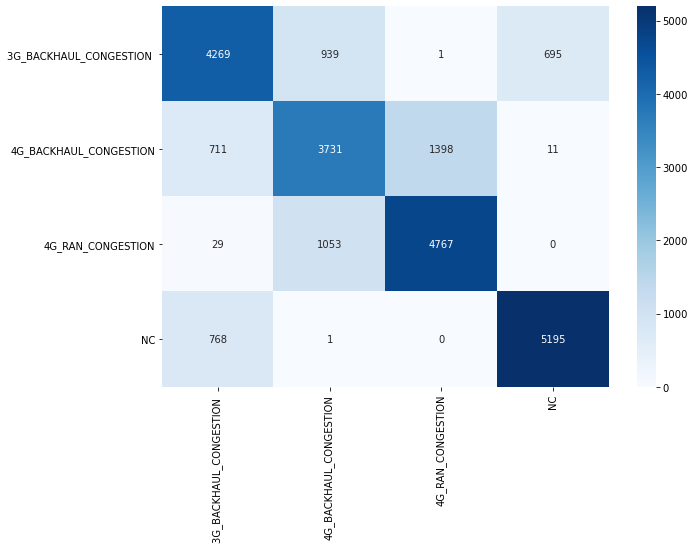

In [49]:
conf_mat = confusion_matrix(y_test_orig, y_pred_scaled_orig)
df_conf_mat = pd.DataFrame(conf_mat, index = ['3G_BACKHAUL_CONGESTION ', '4G_BACKHAUL_CONGESTION', '4G_RAN_CONGESTION', 'NC'],
                  columns = ['3G_BACKHAUL_CONGESTION ', '4G_BACKHAUL_CONGESTION', '4G_RAN_CONGESTION', 'NC'])
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

3. What all steps can be taken to improve the accuracy? (15 points)

Standardization
Feature Scaling - As all the data is in bytes there is no issues found with normalisation in this case

You can improve your accuracy by performing a Grid Search to tune the hyperparameters of your model

Scikit-Learn provides the GridSearchCV class for this

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.arange(1, 7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Using sklearn’sGridSearchCV, we define our grid of parameters to search over and then run the grid search.
trial = GridSearchCV(clf_st, param_grid)

# fit the model on train data
trial.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1, 2, 3, 4, 5, 6]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [53]:
# predict the values on test data
y_pred_test = trial.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.760734894772573

In [56]:
print('Best C:',trial.best_estimator_.C)

# print best tolerance
print('Best penalty:',trial.best_estimator_.penalty) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best solver:',trial.best_estimator_.solver)

Best C: 5
Best penalty: l2
Best solver: lbfgs


In [59]:
clf_cv = LogisticRegression(random_state=0, penalty='l2', C=5, solver = 'lbfgs').fit(X_train_scaled, y_train)
test = clf_cv.predict(X_test_scaled)
accuracy_score(y_test, test)

0.760734894772573

4. What do you conclude from this project? (10 points)

We were able to classify with an accuracy around 76% using ridge regression (l2 parameter)

In [60]:
print(classification_report(y_test, test, digits=2))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5904
           1       0.65      0.64      0.65      5851
           2       0.77      0.81      0.79      5849
           3       0.89      0.85      0.87      5964

    accuracy                           0.76     23568
   macro avg       0.76      0.76      0.76     23568
weighted avg       0.76      0.76      0.76     23568

